## 기본 학습



In [ ]:
# =========================================
# 🌎 Open-World Binary Classification
# Random Forest Model Training & Evaluation
# =========================================
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix,
    roc_auc_score,
    roc_curve
)
import matplotlib.pyplot as plt

# -----------------------------------------------------
# 1️⃣ 파일 경로 설정 (경로는 본인 드라이브 구조에 맞게 수정)
# -----------------------------------------------------
from google.colab import drive
drive.mount('/content/drive')

BASE_PATH = "/content/drive/MyDrive/ML_Dataset"

X_train = np.load(f"{BASE_PATH}/X_train_bin.npy")
X_test  = np.load(f"{BASE_PATH}/X_test_bin.npy")
y_train = np.load(f"{BASE_PATH}/y_train_bin.npy")
y_test  = np.load(f"{BASE_PATH}/y_test_bin.npy")

print("✅ Data loaded successfully!")
print("X_train:", X_train.shape, " | y_train:", y_train.shape)
print("X_test :", X_test.shape,  " | y_test :", y_test.shape)

# -----------------------------------------------------
# 2️⃣ 모델 정의 및 학습
# -----------------------------------------------------
rf_bin = RandomForestClassifier(
    n_estimators=200,
    criterion='entropy',
    random_state=42,
    n_jobs=-1
)

print("\n🚀 Training Random Forest model...")
rf_bin.fit(X_train, y_train)
print("✅ Training complete!\n")


Mounted at /content/drive
✅ Data loaded successfully!
X_train: (16500, 25)  | y_train: (16500,)
X_test : (5500, 25)  | y_test : (5500,)

🚀 Training Random Forest model...
✅ Training complete!



In [ ]:
# -----------------------------------------------------
# 3️⃣ 예측 및 성능 평가
# -----------------------------------------------------
y_pred = rf_bin.predict(X_test)
y_prob = rf_bin.predict_proba(X_test)[:, 1]  # ROC용 확률 값

acc = accuracy_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_prob)
cm  = confusion_matrix(y_test, y_pred)

print(f"🎯 Accuracy: {acc:.4f}")
print(f"🎯 ROC-AUC : {auc:.4f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", cm)


🎯 Accuracy: 0.9469
🎯 ROC-AUC : 0.9691

Classification Report:
               precision    recall  f1-score   support

        -1.0       0.85      0.75      0.79       750
         1.0       0.96      0.98      0.97      4750

    accuracy                           0.95      5500
   macro avg       0.90      0.86      0.88      5500
weighted avg       0.95      0.95      0.95      5500

Confusion Matrix:
 [[ 559  191]
 [ 101 4649]]


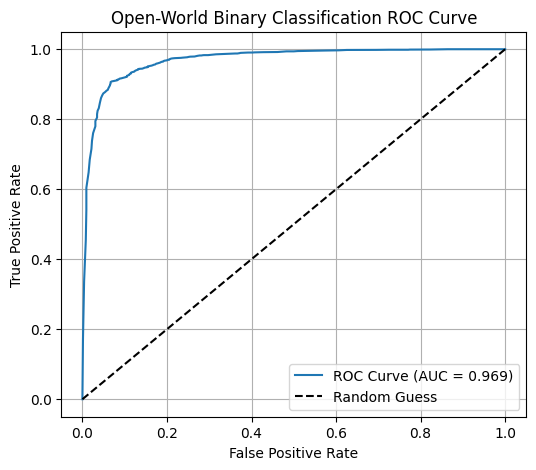

In [ ]:
# -----------------------------------------------------
# 4️⃣ ROC Curve 시각화
# -----------------------------------------------------
fpr, tpr, _ = roc_curve(y_test, y_prob)
plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {auc:.3f})")
plt.plot([0,1], [0,1], 'k--', label="Random Guess")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Open-World Binary Classification ROC Curve")
plt.legend()
plt.grid(True)
plt.show()


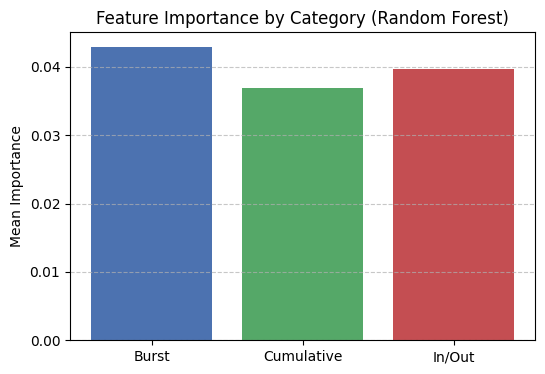

Burst importance: 0.0429
Cumulative importance: 0.0369
In/Out importance: 0.0398


In [ ]:
# -----------------------------------------------------
# 🌿 5️⃣ Feature Importance (3개 피처 기준)
# -----------------------------------------------------
import matplotlib.pyplot as plt
import numpy as np

# 피처 이름 설정
feature_names = ["Burst", "Cumulative", "In/Out"]

# 중요도 계산
importances = rf_bin.feature_importances_

# 혹시 전처리 과정에서 각 피처가 여러 차원으로 분리되어 있다면,
# 아래처럼 그룹별 평균을 내서 대표값으로 요약할 수도 있습니다.
# (예: Burst = 11차원, Cumulative = 10차원, In/Out = 4차원)
burst_dim = 11
cum_dim = 10
inout_dim = 4

feature_group_means = [
    np.mean(importances[:burst_dim]),
    np.mean(importances[burst_dim:burst_dim+cum_dim]),
    np.mean(importances[-inout_dim:])
]

# 시각화
plt.figure(figsize=(6,4))
plt.bar(feature_names, feature_group_means, color=['#4C72B0','#55A868','#C44E52'])
plt.title("Feature Importance by Category (Random Forest)")
plt.ylabel("Mean Importance")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# 출력도 함께
for name, val in zip(feature_names, feature_group_means):
    print(f"{name} importance: {val:.4f}")
